In [132]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [133]:
data=np.loadtxt("datos.txt",delimiter=',',skiprows=0,usecols=[0,1],dtype='float')
print(data[:,1])
dataSize = data.shape
print(dataSize[0])
print(dataSize[1])

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]
97
2


**PLOT DATA**

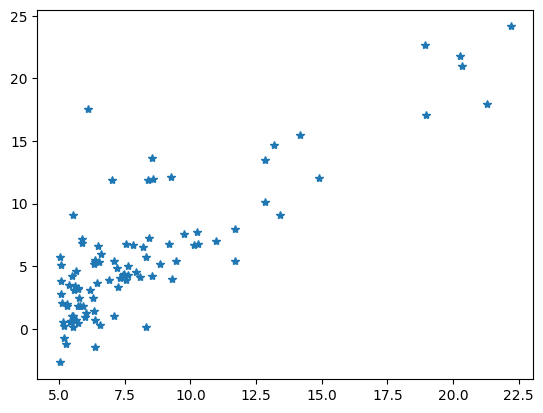

In [134]:
plt.plot(data[:,0],data[:,1],'*')
plt.show()

In [135]:
Beta = np.zeros((2,1)) # Beta es un vector de 2 filas 1 columna, almacenará a B0 y B1
onesVector = np.ones((dataSize[0],)) # Crea un vector de unos del tamaño de datazise[0]

# Crea la matriz X concatenando onesvector con data[:,0] ==> [:,0] significa todas las filas de la columna 0
X = np.column_stack((onesVector,data[:,0]))

# Crea un vector de 0 de 97 filas y 1 columna
y=np.zeros((dataSize[0],1))

# Se asignan las salidas al vector y
y[:,0] = data[:,1]

alpha = 0.01 # Valor reomendado
numIter = 500 # Se hace por tanteo, dependiendo del comportamiento de la gráfica de Cost 
m = dataSize[0] # Cantidad de datos de entrenamiento


In [136]:
#En esta celda se calcula la parte importante de B0 o B1

# Me crea una vector con la columna 0 de la matriz X y me queda de tamaño mx1
temp1 = (np.reshape(X[:,0],(m,1)))

# Se obtiene la hipotesis haciendo la maultiplicación matricial con np.dot
h_beta = np.dot(X,Beta)

# p.multiply es para multiplicar 2 vectores de dimensiones exactas, es multiplicación uno a uno 
# np.subtract toma el vector h_beta y le resta el vector y que tiene las salidas ambos vectores son de mx1. Hace una resta 1 a 1
# Se multiplica con temp1 a manera de ejercicio, ya que es multiplicar por 1
temp3 = np. multiply(temp1,(np.subtract(h_beta,y)))

# Se realiza la sumaroria de temp3
temp2 = np.sum(temp3)

# a B0 se le resta temp2 y nos da como resultado a B0
# Para calcular B1 se debe de cambiar en temp3, temp1 por las entradas  del vector X
temp4 = temp2 * (alpha/m)

In [137]:
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((2,1))
  h_beta = np.zeros((m,1))

  for i in range(numIter):
    h_beta = np.dot(X,Beta)
    for j in range(2): # Con J=0 se calcula B0 y con J=1 se calcula B1
      temp1 = (np.reshape(X[:,j],(m,1)))

      #Creo temp_diff solo para guardar la resta entre hipotesis y y
      temp_diff = np.subtract(h_beta, y)

      # En temp2 reemplazo la parte correspondiente a la resta po la variable temp_diff
      temp2 = np.sum(np. multiply(temp1,temp_diff))

      betaTemp[j,0] = Beta[j,0] - (temp2*(alpha/m))

    Beta = betaTemp
    h_beta = np.dot(X,Beta)

    # Cost hace la sumatoria de los cuadrados de temp_diff
    J[i]  = np.sum(np.square(temp_diff)) 

  return (Beta, J)


Beta0:  [-3.89558599]
Beta1:  [1.19301407]


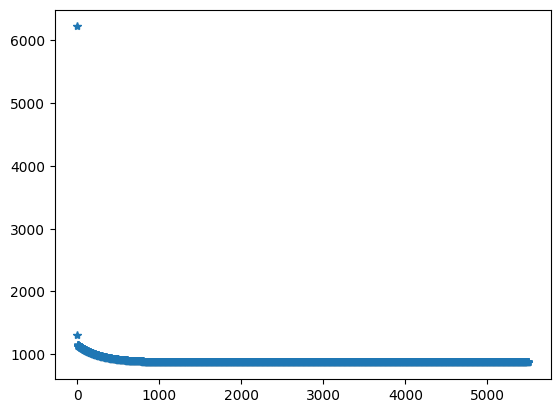

In [138]:
alpha = 0.01
numIter = 5500
J = np.zeros((numIter,1))
Beta = np.zeros((2,1))

Beta, J = Gradiente(Beta,alpha,m,X,y,numIter,J)

plt.plot(J,'*')
print('Beta0: ', Beta[0])
print('Beta1: ', Beta[1])


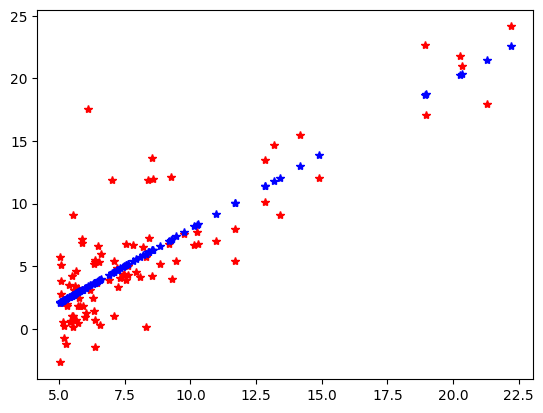

In [139]:
h_beta = np.dot(X,Beta)
plt.plot(data[:,0],data[:,1],'r*')
plt.plot(data[:,0],h_beta,'b*')
plt.show()